In [1]:
#Importing necessary tools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.graphics.correlation
from statsmodels.graphics.regressionplots import *
import statsmodels.regression.linear_model
import statsmodels.stats.api as stats
import statsmodels.stats.stattools as stools

from patsy import dmatrices

In [4]:
df = pd.read_excel("U:\\Python\\Deposits.xlsx")
df.head()

,Date,Foreign deposits,Domestic deposits interest-bearing,Domestic deposits noninterest-bearing,Total interest expense
0,1984Q1,346927.996,1860604.628,363955.726,59109.697
1,1984Q2,345313.290,1921612.686,379300.050,62633.848
2,1984Q3,326893.665,1964712.984,364125.250,67994.237
3,1984Q4,317569.815,2043037.290,421535.819,67890.338
4,1985Q1,332165.522,2086013.731,371462.367,65997.470


In [5]:
df.drop('Date', axis=1)

,Foreign deposits,Domestic deposits interest-bearing,Domestic deposits noninterest-bearing,Total interest expense
0,346927.996,1860604.628,363955.726,59109.697
1,345313.290,1921612.686,379300.050,62633.848
2,326893.665,1964712.984,364125.250,67994.237
3,317569.815,2043037.290,421535.819,67890.338
4,332165.522,2086013.731,371462.367,65997.470
5,329074.081,2124431.654,400008.579,65159.870
6,327204.973,2162306.672,424540.927,63999.755
7,321843.750,2216165.276,460092.446,63597.595
8,333184.797,2394639.992,430844.896,63988.621
9,321691.210,2422642.142,461750.530,61074.501


In [7]:
df.rename(columns = {"Foreign deposits":"Fodeps"},inplace = True) #Zmiana nazwy zmiennej z kolumny Per capita income

df.rename(columns = {"Domestic deposits interest-bearing" : "Ddib"}, inplace = True)

df.rename(columns = {"Domestic deposits noninterest-bearing": "Ddnb"}, inplace = True)

df.rename(columns = {"Total interest expense": "Expense"}, inplace = True)

df.head()
df.describe()

,Fodeps,Ddib,Ddnb,Expense
count,1.360000e+02,1.360000e+02,1.360000e+02,136.000000
mean,8.013804e+05,4.348848e+06,1.171892e+06,47118.371353
std,4.669992e+05,1.973323e+06,8.646050e+05,22460.825276
min,2.867995e+05,1.860605e+06,3.639557e+05,11544.706000
25%,3.335913e+05,2.733601e+06,5.004109e+05,29550.963500
50%,6.468718e+05,3.485419e+06,7.572853e+05,48882.770000
75%,1.338838e+06,6.091773e+06,1.466027e+06,63991.404500
max,1.611252e+06,8.833089e+06,3.248166e+06,97214.895000


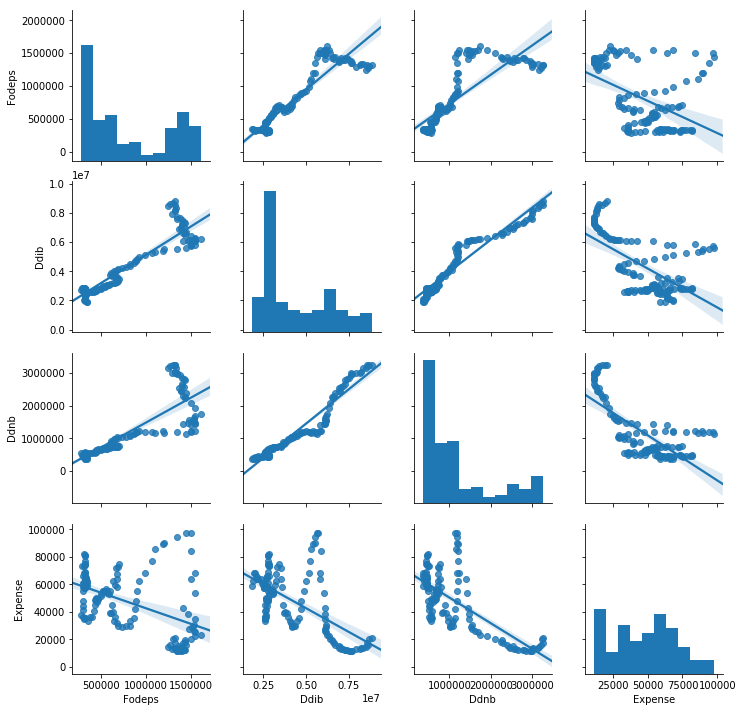

In [8]:
#Initial data preview

sns.pairplot(data=df, vars=['Fodeps', 'Ddib', 'Ddnb', 'Expense'], kind='reg')


C:\Users\jm24191\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\jm24191\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\jm24191\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\jm24191\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' 

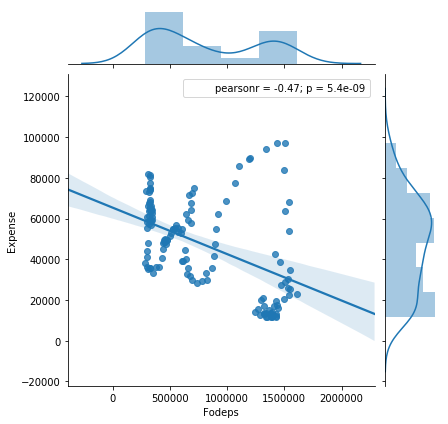

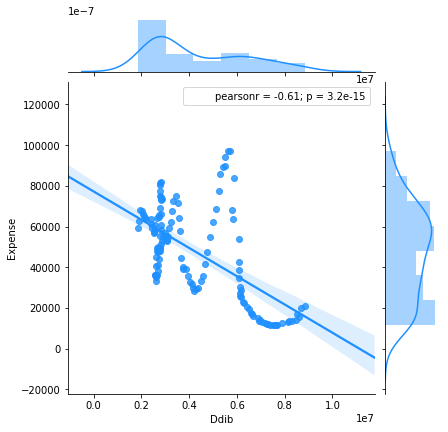

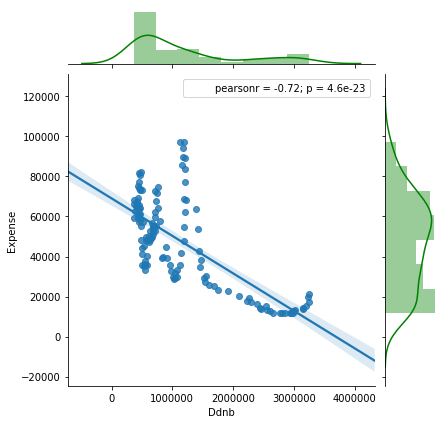

In [9]:
sns.jointplot(x="Fodeps", y="Expense", data=df, kind="reg")
sns.jointplot(x="Ddib", y="Expense", data=df, kind="reg", color = 'dodgerblue')
sns.jointplot(x="Ddnb", y="Expense", data=df, kind="reg", marginal_kws={'color': 'green'})

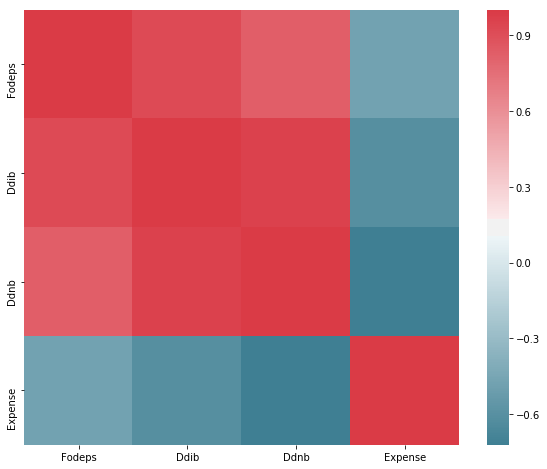

In [10]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [12]:
cm = sns.light_palette("deepskyblue", as_cmap=True)


s = corr.style.background_gradient(cmap=cm).set_precision(4)

s

,Fodeps,Ddib,Ddnb,Expense
Fodeps,1,0.9231,0.8277,-0.4744
Ddib,0.9231,1,0.9649,-0.61
Ddnb,0.8277,0.9649,1,-0.7206
Expense,-0.4744,-0.61,-0.7206,1


In [13]:
import statsmodels.formula.api as smf

model = smf.ols(formula = "Expense ~ Fodeps + Ddib + Ddnb", data = df).fit()
y, X = dmatrices("Expense ~ Fodeps + Ddib + Ddnb", data = df, return_type = "dataframe")
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Expense   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     76.78
Date:                Mon, 08 Oct 2018   Prob (F-statistic):           8.42e-29
Time:                        15:33:11   Log-Likelihood:                -1486.5
No. Observations:                 136   AIC:                             2981.
Df Residuals:                     132   BIC:                             2993.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.616e+04   6016.987      6.010      0.000    2.43e+04    4.81e+04
Fodeps        -0.0169      0.008     -2.006      0.047      -0.033      -0.000
Ddib           0.0212      0.004      5.004      0.000       0.013       0.030
Ddnb          -0.0580      0.007     -8.729      0.000      -0.071      -0.045
==============================================================================
Omnibus:                        1.420   Durbin-Watson:                   0.114
Prob(Omnibus):                  0.492   Jarque-Bera (JB):                1.214
Skew:                          -0.016   Prob(JB):                        0.545
Kurtosis:                       2.538   Cond. No.                     2.59e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.59e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
# Collinearity diagnostics - VIF. All variables exceed 10, so the assumption of noncollinearity between predictors is violated
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

[26.19477434460168, 11.054502008316948, 50.44296872064393, 23.69114912980724]


In [16]:
# Residuals normality checking. S-W's test very small p-value is the evidence of non-normal distribution of residuals
from scipy import stats
stats.shapiro(model.resid)

(0.9679672718048096, 0.0027306051924824715)

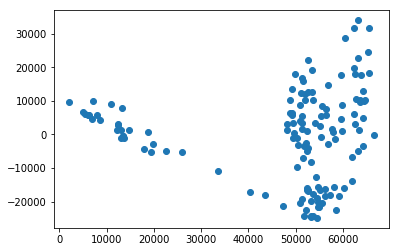

In [17]:
#Residual scatter plot. The presence of two clear patterns shows that there is a room for improvement

plt.scatter(model.predict(), model.resid)
plt.show()


Text(0.5,0,'Normalized residuals checking')

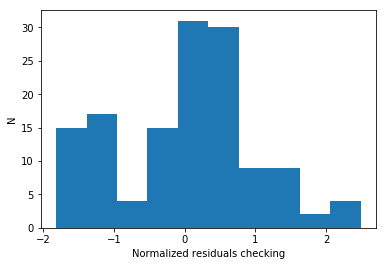

In [19]:
# Residual histogram is not symmetrically distributed
plt.hist(model.resid_pearson)
plt.ylabel('N')
plt.xlabel('Normalized residuals checking')

In [20]:
#homoscedasticity checking - p-value is very small, so we reject H0 on homoscedasticity in favour of H1. 
#The size of the error term differs across values of independent variables

import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F-Stat', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
lzip(name, test)

[('F-Stat', 2.9690708835362454), ('p-value', 1.1375388299913021e-05)]

In [21]:
#The same situation takes place when we use LM-test

name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 46.0088909613091),
 ('p-value', 5.646852771960847e-10),
 ('f-value', 22.49545787270197),
 ('f p-value', 7.927690566965324e-12)]

<StemContainer object of 3 artists>

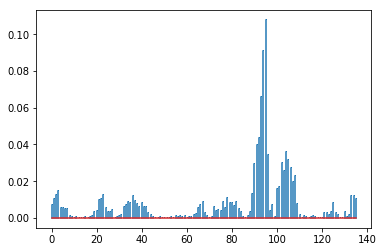

In [22]:
# Cook's distance for the sample is 0,029 (4/136). The data set contains outliers.

influence = model.get_influence()
(c, p) = influence.cooks_distance
plt.stem(np.arange(len(c)), c, markerfmt=",")

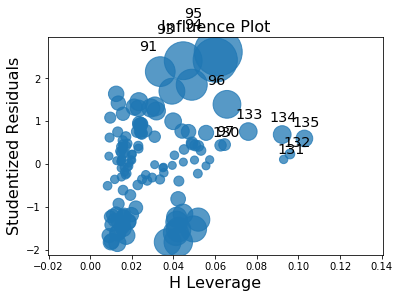

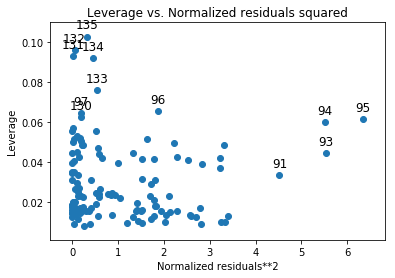

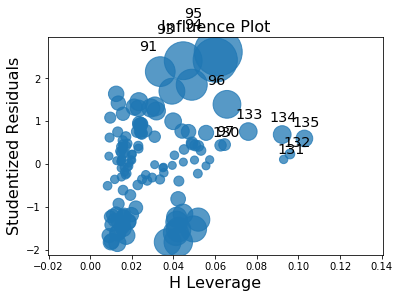

In [23]:
# Leverage plot and detecting influential observations. There are couple of influence observations which make obtained estimations biased.

plot_leverage_resid2(model)
influence_plot(model)

In [67]:
# Let's transform variables
df
df.drop('Date', axis=1)

,Fodeps,Ddib,Ddnb,Expense
0,346927.996,1860604.628,363955.726,59109.697
1,345313.290,1921612.686,379300.050,62633.848
2,326893.665,1964712.984,364125.250,67994.237
3,317569.815,2043037.290,421535.819,67890.338
4,332165.522,2086013.731,371462.367,65997.470
5,329074.081,2124431.654,400008.579,65159.870
6,327204.973,2162306.672,424540.927,63999.755
7,321843.750,2216165.276,460092.446,63597.595
8,333184.797,2394639.992,430844.896,63988.621
9,321691.210,2422642.142,461750.530,61074.501


In [79]:
#standarizing variables

from sklearn import preprocessing
names = df.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=names)

In [81]:
# Checking post transformation form

scaled_df

,Fodeps,Ddib,Ddnb,Expense
0,-0.976731,-1.265603,-0.937911,0.535851
1,-0.980201,-1.234572,-0.920099,0.693333
2,-1.019789,-1.212650,-0.937715,0.932870
3,-1.039829,-1.172811,-0.871068,0.928228
4,-1.008459,-1.150952,-0.929197,0.843642
5,-1.015103,-1.131411,-0.896059,0.806212
6,-1.019120,-1.112147,-0.867580,0.754371
7,-1.030643,-1.084753,-0.826309,0.736400
8,-1.006268,-0.993975,-0.860262,0.753873
9,-1.030971,-0.979732,-0.824384,0.623651


In [83]:
# Regression model estimated on transformed data. AIC value has much decreased but so were not standard errors. 

model2 = smf.ols(formula = "Expense ~ Fodeps + Ddib + Ddnb - 1", data = scaled_df).fit()
y, X = dmatrices("Expense ~ Fodeps + Ddib + Ddnb", data = scaled_df, return_type = "dataframe")
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Expense   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     77.36
Date:                Mon, 08 Oct 2018   Prob (F-statistic):           5.10e-29
Time:                        17:19:54   Log-Likelihood:                -124.31
No. Observations:                 136   AIC:                             254.6
Df Residuals:                     133   BIC:                             263.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Fodeps        -0.3504      0.174     -2.013      0.046      -0.695      -0.006
Ddib           1.8669      0.372      5.022      0.000       1.132       2.602
Ddnb          -2.2320      0.255     -8.762      0.000      -2.736      -1.728
==============================================================================
Omnibus:                        1.420   Durbin-Watson:                   0.114
Prob(Omnibus):                  0.492   Jarque-Bera (JB):                1.214
Skew:                          -0.016   Prob(JB):                        0.545
Kurtosis:                       2.538   Cond. No.                         14.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

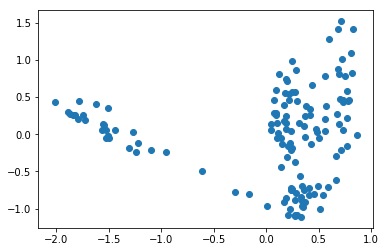

In [85]:
#Residual scatter plot is not favourable for linear regression assumptions again.

plt.scatter(model2.predict(), model2.resid)
plt.show()

In [93]:
# So transform input data once again. A logarithmic transformation has been applied and the variables changed their name just 
# for make writing easier by shortening the length of the variables.

to_log = ['Expense', 'Fodeps', 'Ddib', 'Ddnb']
df_log = df[to_log].applymap(lambda x: np.log(x+1))

df_log = df[to_log].applymap(lambda x: np.log(x+1))
# rename columns
df_log.columns = 'log_' + df_log.columns


In [94]:
# shift the index
df_log.index = df_log.index + 1

In [104]:
df_log

,log_Expense,log_Fodeps,log_Ddib,log_Ddnb
1,10.987167,12.756875,14.436413,12.804790
2,11.045077,12.752210,14.468676,12.846085
3,11.127193,12.697393,14.490857,12.805256
4,11.125664,12.668456,14.529949,12.951662
5,11.097387,12.713392,14.550766,12.825206
6,11.084614,12.704041,14.569015,12.899244
7,11.066650,12.698345,14.586687,12.958766
8,11.060347,12.681825,14.611289,13.039185
9,11.066476,12.716456,14.688744,12.973506
10,11.019866,12.681350,14.700370,13.042782


In [96]:
# Now results seem to show much better model fit. AIC has decreased again, and the R-square measure quite the reverse. 

model3 = smf.ols(formula = "log_Expense ~ log_Fodeps + log_Ddib + log_Ddnb - 1", data = df_log).fit()
y, X = dmatrices("log_Expense ~ log_Fodeps + log_Ddib + log_Ddnb", data = df_log, return_type = "dataframe")
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_Expense   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 7.609e+04
Date:                Mon, 08 Oct 2018   Prob (F-statistic):          7.08e-215
Time:                        17:33:01   Log-Likelihood:                -7.9135
No. Observations:                 136   AIC:                             21.83
Df Residuals:                     133   BIC:                             30.57
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
log_Fodeps     0.5451      0.101      5.410      0.000       0.346       0.744
log_Ddib       2.9570      0.078     38.119      0.000       2.804       3.110
log_Ddnb      -3.0285      0.097    -31.168      0.000      -3.221      -2.836
==============================================================================
Omnibus:                        6.979   Durbin-Watson:                   0.490
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                3.291
Skew:                          -0.067   Prob(JB):                        0.193
Kurtosis:                       2.250   Cond. No.                         139.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

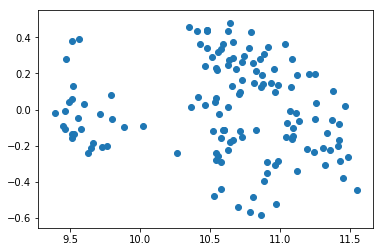

In [97]:
#Now residuals tend to cluster towards the middle of the plot, therefore one can say an improvement has been achieved.

plt.scatter(model3.predict(), model3.resid)
plt.show()

Text(0.5,0,'Normalized residuals checking')

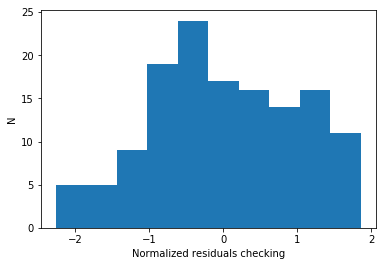

In [98]:
# But the histogram still is not symmetric.
plt.hist(model3.resid_pearson)
plt.ylabel('N')
plt.xlabel('Normalized residuals checking')

In [99]:
# And residual test still indicates that there is no normality in our data
from scipy import stats
stats.shapiro(model3.resid)

(0.9781296253204346, 0.02756999060511589)

In [100]:
# The transformation was also unable to remove heteroscedasticity

name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model3.resid, model3.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 66.77333683697519),
 ('p-value', 3.164857327633102e-15),
 ('f-value', 42.76220266172973),
 ('f p-value', 2.0557785130085002e-19)]

In [ ]:
# It was decided to change an analyctical form of the model then. The second proposition lies in time series framework.